In [27]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
from matplotlib.colors import ListedColormap
cmap= ListedColormap(['#FF0000','#00FF00','#0000FF'])
from collections import Counter


In [33]:
class linearRegression():
    
    def __init__(self,l=0.0001,n=10):
        self.n=n
        self.l=l
        self.weight=None
        self.bias=None
    
    def fit(self,X,y):
        n_samples,n_features=X.shape
        self.weight=np.zeros(n_features)
        self.bias=0
        cost=0
        for _ in range(self.n):
            y_hat= np.dot(X,self.weight)+self.bias
            cost=(1/(2*self.n))*np.sum(np.square(y-y_hat))
        
            dw =1/(self.n) *(np.dot(X.T,y_hat-y))
            db= 1/(self.n)* np.sum(y_hat-y)
            
            self.weight-=self.l*dw
            self.bias-=self.l*db
            
        print(cost)
            
    def predict(self,X):
        return np.dot(X,self.weight)+self.bias
    
    def predict_logisticRegression(self,X):
        pred=np.dot(X,self.weight)+self.bias
        pred_sig=1/1+np.exp(-(pred))
        return [1 if value>0.5 else 0 for value in pred_sig]
    
    
                
    

In [34]:
from sklearn import datasets
X,y=datasets.make_regression(n_samples=100,n_features=1,noise=20, random_state=4)

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)



In [36]:
lgr=linearRegression(0.1,20000)

In [37]:

lgr.fit(X_train,y_train)
y_pred=lgr.predict(X)

0.5727671386753566


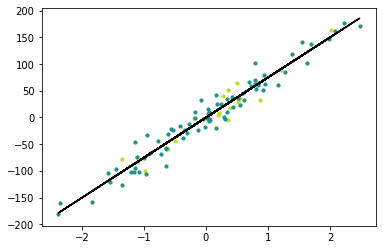

In [38]:
cmap=plt.get_cmap('viridis')
plt.plot(X,y_pred,color='black')
plt.scatter(X_test,y_test,color=cmap(0.9),s=10)
plt.scatter(X_train,y_train,color=cmap(0.5),s=10)
